In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv("/content/preprocessed.csv")

In [3]:
X = df[['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']]
y = df['Survived']

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
lr = LogisticRegression()

cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Score:", cv_scores.mean())
lr.fit(X_train, y_train)

Cross-Validation Scores: [0.81118881 0.81118881 0.78873239 0.75352113 0.80985915]
Mean Score: 0.7948980596867921


LogisticRegression()

In [7]:
y_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

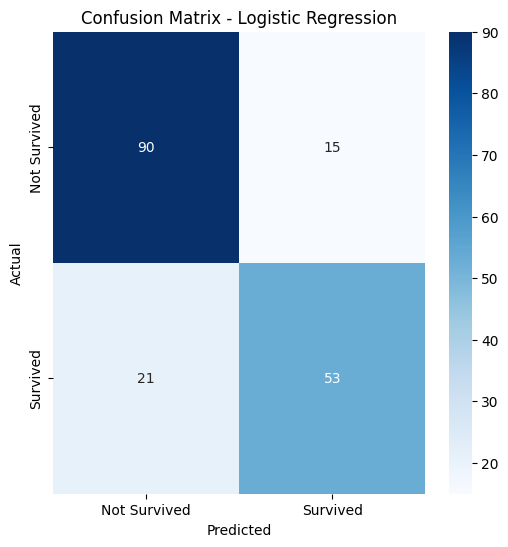

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [19]:
input_data = {
    'Age': [15],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [60],
    'Sex_female': [1],
    'Sex_male': [0],
    'Embarked_C': [1],
    'Embarked_Q': [0],
    'Embarked_S': [0],
    'Pclass_1': [1],
    'Pclass_2': [0],
    'Pclass_3': [0]
}

input_df = pd.DataFrame(input_data)

prediction = lr.predict(input_df)
print("Predicted Survival Status:", prediction[0])

Predicted Survival Status: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
